In [1]:
import os 
import pandas as pd 
import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from qmplot import manhattanplot
os.chdir("/mnt/BioHome/jreyna/jreyna/projects/dchallenge/")
outdir = 'results/main/loop_analysis/'
os.makedirs(outdir, exist_ok=True)

dice_published = ['CLASSICAL_MONOCYTES', 'B_NAIVE', 'CD4_NAIVE', 'CD8_NAIVE', 'NK_CD16POS']
dice_published += ['CM', 'NB', 'CD4N', 'CD8N', 'NK', 'T-cell']
highly_cited_genes = ['BACH2','UBASH3A', 'PTPN22', 'SIRPG', 'CTSH', 'M6PR', 'RGS1']

## Load and organize colocalization/loop data

In [27]:
# loading and concat all the data
data = []
for fn in glob.glob('results/main/loop_analysis/Coloc_Approach/T1D_34012112_Gaulton/*/*/*/master.tsv'):
    
    dice_cline = fn.split('/')[5]
    study = fn.split('/')[6]
    eqtl_cline = fn.split('/')[7]
        
    print(eqtl_cline)
    
    if (eqtl_cline == 'Monocyte'):
        pass
    
    # skip DICE datasets which are still not published
    if (dice_cline not in dice_published):
        continue
        
    # skip DICE cell lines which are stimulated
    # (not filtered correctly in the previous step)
    elif (eqtl_cline in ['CD4_N_STIM', 'CD8_N_STIM']):
        continue
            
    df = pd.read_table(fn, header=0)
    df['dice_cline'] = dice_cline
    df['eqtl_cline'] = eqtl_cline
    df['study'] = study
    data.append(df)
    
data = pd.concat(data)
data.rename(columns={'5kb_gname': 'fivekb_gname'}, inplace=True)

T-cell
TREG_MEMORY
TREG_NAIVE
T-cell
Monocyte
NONCLASSICAL_MONOCYTES
TH2
T-cell
B_NAIVE
CD4_N_STIM
CD4_NAIVE
TH1-17
T-cell
TH1
T-cell
NK_CD16POS
CLASSICAL_MONOCYTES
Monocyte
TH17
T-cell
TFH
T-cell
CD8_N_STIM
CD8_NAIVE


In [28]:
new_order = [
 'sid',
 'rs_id',
 'gene_name',
 'dice_cline',
 'eqtl_cline',
 'study',
 'gene_id',
 'chrom',
 'snp_pos',
 'gene_start',
 'gene_end',
 'is_eqtl_pair',
 'is_coloc_pair',
 'is_closest_gene',
 'has_fithichip_loop',
 'nvar',
 'shape1',
 'shape2',
 'dist',
 'npval',
 'slope',
 'ppval',
 'bpval',
 'qval',
 'pp_H0_Coloc_Summary',
 'pp_H1_Coloc_Summary',
 'pp_H2_Coloc_Summary',
 'pp_H3_Coloc_Summary',
 'pp_H4_Coloc_Summary',
 'ref',
 'alt',
 'AC',
 'AF',
 'AN',
 'gwas_slope',
 'gwas_slope_se',
 'gwas_pval_nominal',
 'SampleSize']

In [29]:
data = data.loc[:, new_order]
data.drop_duplicates(subset=['sid', 'gene_name', 'dice_cline', 'eqtl_cline', 'study'], inplace=True)

In [30]:
# master_fn = os.path.join(outdir, 'snp_gene_loop.analysis.tsv')
# data.to_csv(master_fn, sep='\t', index=False, na_rep='nan')

## Colocalization Summary

I want to know how many colocalization comparisons there are total

In [31]:
coloc_only = data[(data.is_coloc_pair == 1)]
print(coloc_only.shape[0])

56


In [32]:
coloc_only

,sid,rs_id,gene_name,dice_cline,eqtl_cline,study,gene_id,chrom,snp_pos,gene_start,...,pp_H4_Coloc_Summary,ref,alt,AC,AF,AN,gwas_slope,gwas_slope_se,gwas_pval_nominal,SampleSize
95,1:114439522,rs1310183,BCL2L15,NB,B_NAIVE,DICE_eQTL,ENSG00000188761.7,chr1,114439522,114420790,...,1.000000,T,C,1893.0,0.377995,5008.0,-0.127193,0.015211,6.180000e-17,520580.0
162,1:192536813,rs2816316,RGS1,NB,B_NAIVE,DICE_eQTL,ENSG00000090104.7,chr1,192536813,192544857,...,0.886197,C,A,3995.0,0.797724,5008.0,0.105379,0.018600,1.460000e-08,520580.0
366,11:64107735,rs663743,AP003774.1,NB,B_NAIVE,DICE_eQTL,ENSG00000236935.1,chr11,64107735,64092522,...,0.959176,G,A,993.0,0.198283,5008.0,-0.099964,0.015092,3.500000e-11,520580.0
465,12:9866349,rs7977720,RP11-75L1.1,NB,B_NAIVE,DICE_eQTL,ENSG00000256582.1,chr12,9866349,9856673,...,0.979363,C,T,2594.0,0.517971,5008.0,-0.084924,0.013982,1.250000e-09,520580.0
553,12:56470625,rs11171739,RPS26,NB,B_NAIVE,DICE_eQTL,ENSG00000197728.5,chr12,56470625,56435637,...,0.999999,C,T,2781.0,0.555312,5008.0,-0.221374,0.014087,1.190000e-55,520580.0
646,12:112523970,rs11066156,ERP29,NB,B_NAIVE,DICE_eQTL,ENSG00000089248.6,chr12,112523970,112451120,...,1.000000,C,T,1882.0,0.375799,5008.0,-0.168830,0.025851,6.540000e-11,405537.0
891,16:11439303,rs12149160,RMI2,NB,B_NAIVE,DICE_eQTL,ENSG00000175643.7,chr16,11439303,11343476,...,0.999437,G,T,1806.0,0.360623,5008.0,0.098787,0.014092,2.380000e-12,520580.0
1855,6:26394320,rs1131936,BTN3A1,NB,B_NAIVE,DICE_eQTL,ENSG00000026950.12,chr6,26394320,26402465,...,0.999982,A,G,1477.0,0.294928,5008.0,-0.122869,0.021271,7.630000e-09,520580.0
1963,6:126703390,rs9398804,CENPW,NB,B_NAIVE,DICE_eQTL,ENSG00000203760.4,chr6,126703390,126661320,...,1.000000,T,A,3097.0,0.618411,5008.0,0.104421,0.014102,1.320000e-13,520580.0
2019,7:26711104,rs3757654,SKAP2,NB,B_NAIVE,DICE_eQTL,ENSG00000005020.8,chr7,26711104,26706681,...,0.999999,C,T,692.0,0.138179,5008.0,-0.111443,0.016289,7.830000e-12,520580.0


I want to know the breakdown in terms of genes

In [33]:
gene_coloc_occurence = coloc_only.value_counts(subset=['gene_name'])
gene_coloc_occurence = gene_coloc_occurence.to_frame().reset_index()
gene_coloc_occurence.columns = ['Gene', 'Number of Colocalizations']

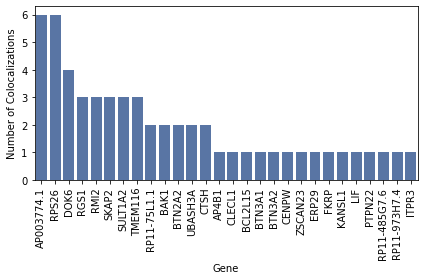

In [34]:
fig, ax = plt.subplots()
sns.barplot(x='Gene',
            y='Number of Colocalizations', 
            data=gene_coloc_occurence,
            color='#4c72b0',
            ax=ax)

for x in ax.get_xticklabels():
    x.set_rotation(90)
    
fn = os.path.join(outdir, 'number_of_colocalizations_per_gene.png')    
fig.tight_layout()
fig.savefig(fn, dpi=600)

I want to know the breakdown in terms of gene-snp

In [35]:
coloc_only.value_counts(subset=['gene_name', 'sid'])

gene_name     sid         
RPS26         12:56401085     4
AP003774.1    11:64107477     4
UBASH3A       21:43855067     2
RP11-75L1.1   12:9866349      2
FKRP          19:47203356     1
ERP29         12:112523970    1
DOK6          18:67539392     1
              18:67525857     1
              18:67524383     1
              18:67511645     1
CTSH          15:79237293     1
              15:79231478     1
CLECL1        12:9889157      1
ZSCAN23       6:28421567      1
ITPR3         6:33580350      1
BTN3A2        6:26357898      1
BTN3A1        6:26394320      1
BTN2A2        6:26390963      1
              6:26383250      1
BCL2L15       1:114439522     1
BAK1          6:33548090      1
              6:33541507      1
AP4B1         1:114426001     1
AP003774.1    11:64107735     1
CENPW         6:126703390     1
LIF           22:30592487     1
KANSL1        17:43965129     1
PTPN22        1:114086821     1
TMEM116       12:112523970    1
              12:112521448    1
             

I want to know the breakdown in terms of gene-snp-cell-line tuple

In [36]:
coloc_only.value_counts(subset=['gene_name', 'sid', 'dice_cline'])

gene_name     sid           dice_cline
AP003774.1    11:64107477   CM            2
ZSCAN23       6:28421567    NK            1
CENPW         6:126703390   NB            1
KANSL1        17:43965129   CM            1
ITPR3         6:33580350    NK            1
FKRP          19:47203356   CM            1
ERP29         12:112523970  NB            1
DOK6          18:67539392   CD8N          1
              18:67525857   CD4N          1
              18:67524383   NK            1
              18:67511645   CM            1
CTSH          15:79237293   CM            1
              15:79231478   CM            1
CLECL1        12:9889157    CM            1
BTN3A2        6:26357898    CD4N          1
PTPN22        1:114086821   NK            1
BTN3A1        6:26394320    NB            1
BTN2A2        6:26390963    NK            1
              6:26383250    CM            1
BCL2L15       1:114439522   NB            1
BAK1          6:33548090    CM            1
              6:33541507    CM       

I want to know the breakdown in terms of study/cell line

In [37]:
coloc_only.value_counts(subset=['study', 'dice_cline'])

study           dice_cline
BLUEPRINT_eQTL  CM            15
DICE_eQTL       NB            10
                NK             9
                CD4N           9
                CM             7
                CD8N           6
dtype: int64

## Colocalized Loops Summary

### Breakdown of colocalized loops (SNP perspective)

I want to know how many colocalizations have a loop

In [38]:
coloc_loops_only = data[(data.is_coloc_pair == 1) & (data.has_fithichip_loop == 1)]
print(coloc_loops_only.shape[0])

7


I want to know the breakdown in terms of genes only

In [39]:
coloc_loops_only.value_counts(subset=['gene_name'])

gene_name 
UBASH3A       2
RMI2          2
AP003774.1    2
CTSH          1
dtype: int64

I want to know the breakdown in terms of snp-gene pairs

In [40]:
coloc_loops_only.value_counts(subset=['sid', 'gene_name'])

sid          gene_name 
21:43855067  UBASH3A       2
16:11439679  RMI2          1
16:11439303  RMI2          1
15:79231478  CTSH          1
11:64107735  AP003774.1    1
11:64102948  AP003774.1    1
dtype: int64

I want to know the breakdown in terms of gene-snp-cell-line tuple

In [41]:
coloc_loops_only.value_counts(subset=['gene_name', 'sid', 'dice_cline'])

gene_name   sid          dice_cline
UBASH3A     21:43855067  CD8N          1
                         CD4N          1
RMI2        16:11439679  CD8N          1
            16:11439303  NB            1
CTSH        15:79231478  CM            1
AP003774.1  11:64107735  NB            1
            11:64102948  NK            1
dtype: int64

In [42]:
table2 = coloc_loops_only.value_counts(subset=['study', 'eqtl_cline'])
table2 = table2.to_frame().reset_index()
table2.columns = ['Study', 'Cell Line', 'Number of SNP-gene loops (SGLs)']
table2_fn = 'results/main/manual_stats/Table_2.Redo.xlsx'
table2.to_excel(table2_fn)

In [43]:
table2

,Study,Cell Line,Number of SNP-gene loops (SGLs)
0,DICE_eQTL,CD8_NAIVE,2
1,DICE_eQTL,B_NAIVE,2
2,DICE_eQTL,NK_CD16POS,1
3,DICE_eQTL,CLASSICAL_MONOCYTES,1
4,DICE_eQTL,CD4_NAIVE,1


### Breakdown of colocalized loops (Gene perspective)

In [18]:
coloc_loops_only.groupby(['gene_name']).rs_id.unique()

gene_name
AP003774.1      [rs663743, rs574087]
CTSH                    [rs12148472]
RMI2          [rs12149160, rs918738]
UBASH3A                  [rs1893592]
Name: rs_id, dtype: object

In [19]:
coloc_loops_only.groupby(['gene_name']).rs_id.nunique().sort_values()

gene_name
CTSH          1
UBASH3A       1
AP003774.1    2
RMI2          2
Name: rs_id, dtype: int64

In [20]:
coloc_loops_only.groupby(['gene_name']).rs_id.nunique().sort_values().shape

(4,)

#### Making a master

In [21]:
coloc_summary = coloc_loops_only.loc[~coloc_loops_only.duplicated(subset=['study', 'eqtl_cline', 'sid', 'gene_id']), :]
coloc_summary = coloc_summary.groupby(['study', 'eqtl_cline']).apply(len)
coloc_summary = coloc_summary.reset_index()
coloc_summary.study = coloc_summary.study.str.replace('_eQTL', '')
coloc_summary = coloc_summary.sort_values(['study', 0, 'eqtl_cline'], ascending=[True, False, True])

coloc_summary.columns = ['Study', 'Cell Line', 'Number of SGLs']

fn = os.path.join(outdir, 'description_of_coloc_study.xlsx')
coloc_summary.to_excel(fn, index=False)